# ------------------------------------DATA CLEANING--------------------------------------

# DATA CLEANING 2016

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import csv

### Loading the Csvs and combining into a single dataframe

In [3]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'

In [4]:
df = pd.read_csv(open(cur_path+'/Data2016_Uncleaned.csv','rU'), encoding='utf-8')

### CLEANING

In [5]:
df.shape

(5617658, 109)

### Getting rid of columns having 98% or more missing data

In [6]:
missing_data = df.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/df.shape[0])*100
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent<99.38)]
len(features)

62

In [7]:
d = df[features]

In [55]:
d.columns

Index(['Year', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState',
       'DestStateFips', 'DestStateName', 'DestWac', 'DestAirportSeqID',
       'CRSDepTime', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'Flights', 'DistanceGroup', 'DivAirportLandings', 'DepTimeBlk',
       'DestAirportID', 'Distance', 'OriginStateName', 'OriginWac', 'Month',
       'DayofMonth', 'DayOfWeek', 'FlightDate', 'UniqueCarrier', 'AirlineID',
       'Carrier', 'Quarter', 'Origin', 'OriginStateFips', 'OriginState',
       'OriginCityName', 'FlightNum', 'OriginCityMarketID',
       'OriginAirportSeqID', 'OriginAirportID', 'CRSElapsedTime', 'TailNum',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'WheelsOff', 'TaxiOut', 'TaxiIn', 'WheelsOn',
       'ArrTime', 'ArrivalDelayGroups', 'ActualElapsedTime', 'AirTime',
       'ArrDel15', 'ArrDelayMinutes', 'ArrDelay', 'SecurityDelay',
       'LateAircraftDelay', 'WeatherDelay', 'CarrierDelay', 'NASDelay

### Adding new columns to differentiate flights felayed and ontime flights

In [54]:
d['Flight_Status'] = 0
d.loc[df.DepDel15==1.0 ,'Flight_Status'] = 1
d.loc[df.ArrDel15==1.0,'Flight_Status'] = 1
d.loc[df.Cancelled==1.0, ['Flight_Status']] = 1
d['Flight_Status'] = d['Flight_Status'].astype(int)
d['Status'] = np.where(d['Flight_Status']==1,'Delayed', 'On Time')

### Taking only the columns relevant for the delay

In [81]:
cols = features.tolist()
p = ['FlightDate','TailNum','Carrier','OriginAirportSeqID','OriginCityMarketID','OriginStateFips','OriginState','OriginWac','DestAirportSeqID','DestCityMArketID','DestStateFips','DestWac','DepDelay','DepDel15','DepTimeBlk','SecurityDelay','LateAircraftDelay', 'WeatherDelay', 'CarrierDelay', 'NASDelay',
    'ArrDelay','ArrDel15','ArrTimeBlk','Diverted','Flights','AirTime','DistanceGroup','CancellationCode']
for i in p:
    if i in cols:
        cols.remove(i)

In [82]:
dt= d[cols]
dt.shape

(5617658, 35)

In [83]:
dt.isnull().sum()

Year                        0
DestCityMarketID            0
Dest                        0
DestCityName                0
DestState                   0
DestStateName               0
CRSDepTime                  0
CRSArrTime                  0
Cancelled                   0
DivAirportLandings          0
DestAirportID               0
Distance                    0
OriginStateName             0
Month                       0
DayofMonth                  0
DayOfWeek                   0
UniqueCarrier               0
AirlineID                   0
Quarter                     0
Origin                      0
OriginCityName              0
FlightNum                   0
OriginAirportID             0
CRSElapsedTime              6
DepTime                 63456
DepDelayMinutes         63456
DepartureDelayGroups    63456
WheelsOff               65418
TaxiOut                 65418
TaxiIn                  67844
WheelsOn                67844
ArrTime                 67844
ArrivalDelayGroups      79513
ActualElap

### Removing all the Cancelled Flights details

In [84]:
dt = dt[dt['Cancelled']!=1]

In [85]:
del dt['Cancelled']
dt.shape

(5551797, 34)

In [86]:
dt.isnull().sum()

Year                        0
DestCityMarketID            0
Dest                        0
DestCityName                0
DestState                   0
DestStateName               0
CRSDepTime                  0
CRSArrTime                  0
DivAirportLandings          0
DestAirportID               0
Distance                    0
OriginStateName             0
Month                       0
DayofMonth                  0
DayOfWeek                   0
UniqueCarrier               0
AirlineID                   0
Quarter                     0
Origin                      0
OriginCityName              0
FlightNum                   0
OriginAirportID             0
CRSElapsedTime              0
DepTime                     0
DepDelayMinutes             0
DepartureDelayGroups        0
WheelsOff                   0
TaxiOut                     0
TaxiIn                   1983
WheelsOn                 1983
ArrTime                  1983
ArrivalDelayGroups      13652
ActualElapsedTime       13652
ArrDelayMi

### Removing row having 'ArrTime','ArrDelayMinutes','ActualElapsedTime','ArrDelayMinutes' Nulls

In [87]:
dt = dt[dt['ArrTime'].notnull() & dt['ArrDelayMinutes'].notnull() & dt['ActualElapsedTime'].notnull() & dt['ArrDelayMinutes'].notnull()]
dt.shape

(5538145, 34)

In [88]:
dt.isnull().sum()

Year                    0
DestCityMarketID        0
Dest                    0
DestCityName            0
DestState               0
DestStateName           0
CRSDepTime              0
CRSArrTime              0
DivAirportLandings      0
DestAirportID           0
Distance                0
OriginStateName         0
Month                   0
DayofMonth              0
DayOfWeek               0
UniqueCarrier           0
AirlineID               0
Quarter                 0
Origin                  0
OriginCityName          0
FlightNum               0
OriginAirportID         0
CRSElapsedTime          0
DepTime                 0
DepDelayMinutes         0
DepartureDelayGroups    0
WheelsOff               0
TaxiOut                 0
TaxiIn                  0
WheelsOn                0
ArrTime                 0
ArrivalDelayGroups      0
ActualElapsedTime       0
ArrDelayMinutes         0
dtype: int64

In [90]:
dt.shape

(5538145, 34)

In [226]:
dd = dt
dd.shape

(5538145, 34)

### Removing Outliers

In [227]:
dt[dt.DepDelayMinutes>1350].shape

(48, 34)

In [228]:
dt[dt.ArrDelayMinutes>1400].shape

(41, 34)

In [229]:
dd = dd[dd.DepDelayMinutes<1350]
dd.shape

(5538095, 34)

In [234]:
dd = dd[dd.ArrDelayMinutes<1400]
dd.shape

(5538095, 34)

In [231]:
#dd[(dd.Month==4) & (dd.ArrDelayMinutes >1200)]

In [233]:
#dd[(dd.Month==9) & (dd.ArrDelayMinutes >1210)]

In [235]:
dd = dd.drop(((dd.Month==4) & (dd.ArrDelayMinutes >1200))|((dd.DepDelayMinutes>1200) & (dd.Month==2)) |((dd.DepDelayMinutes>1210) & (dd.Month==5))|((dd.DepDelayMinutes>1200) & (dd.Month==9))| ((dd.DepDelayMinutes>1220) & (dd.Month==10))|((dd.DepDelayMinutes>1200) & (dd.Month==11))|((dd.DepDelayMinutes>1300) & (dd.Month==12)))

In [236]:
dd.shape

(5538093, 34)

In [237]:
dd = dd[dd.ArrDelayMinutes <= 1325]

In [238]:
#dd[(dd.DepDelayMinutes>1200) & (dd.Month==2)]

In [239]:
#dd[(dd.DepDelayMinutes>1210) & (dd.Month==5)]

In [240]:
#dd[(dd.DepDelayMinutes>1200) & (dd.Month==9)]

In [241]:
#dd[(dd.DepDelayMinutes>1220) & (dd.Month==10)]

In [242]:
#dd[(dd.DepDelayMinutes>1200) & (dd.Month==11)]

In [243]:
#dd[(dd.DepDelayMinutes>1300) & (dd.Month==12)]

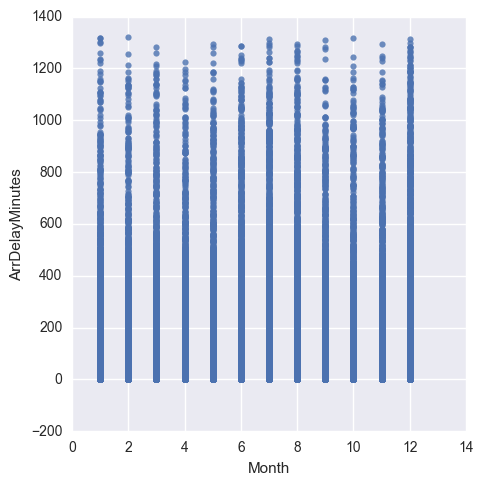

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='ArrDelayMinutes', data=dd, fit_reg=False)
plt.show()

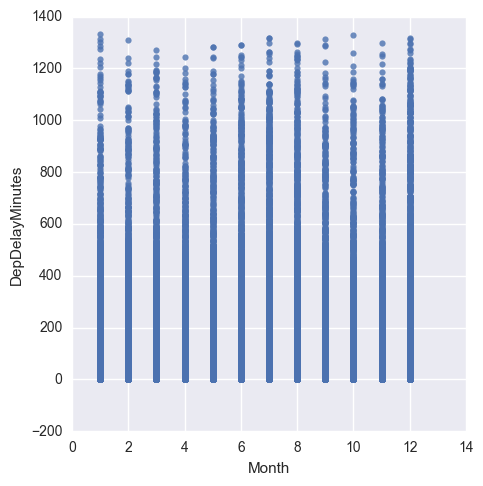

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='DepDelayMinutes', data=dd, fit_reg=False)
plt.show()

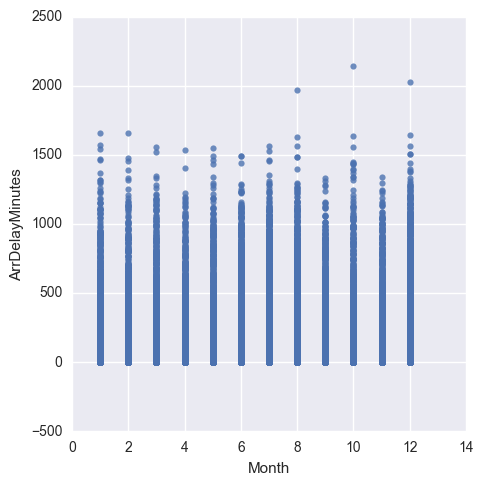

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='ArrDelayMinutes', data=dt, fit_reg=False)
plt.show()

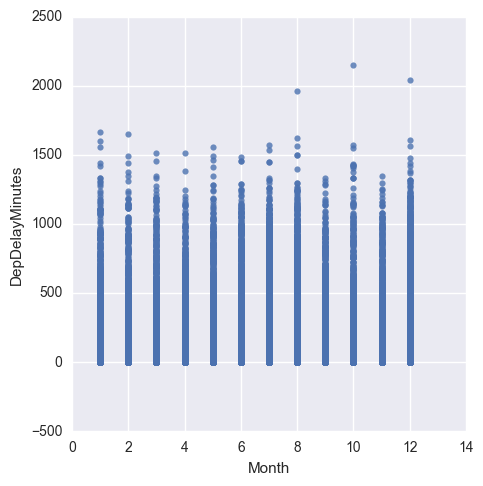

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='DepDelayMinutes', data=dt, fit_reg=False)
plt.show()

In [246]:
dd.to_csv(cur_path+'/Data2016_Cleaned.csv', index = False)

# DATA CLEANING 2017

In [247]:
df1 = pd.read_csv(open(cur_path+'/Data2017_Uncleaned.csv','rU'), encoding='utf-8')

In [248]:
df1.shape

(4276457, 109)

In [249]:
missing_data1 = df1.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data1['Missing_percent'] = (missing_data1['Missing_Count']/df1.shape[0])*100
missing_data1 = missing_data1.sort_values(by='Missing_percent', axis=0, ascending=True)
features1 = missing_data1['index'][(missing_data1.Missing_percent<99.38)]
len(features1)

62

In [250]:
d1 = df1[features1]

In [251]:
d1['Flight_Status'] = 0
d1.loc[df.DepDel15==1.0 ,'Flight_Status'] = 1
d1.loc[df.ArrDel15==1.0,'Flight_Status'] = 1
d1.loc[df.Cancelled==1.0, ['Flight_Status']] = 1
d1['Flight_Status'] = d1['Flight_Status'].astype(int)
d1['Status'] = np.where(d1['Flight_Status']==1,'Delayed', 'On Time')

In [252]:
dt1= d1[cols]
dt1.shape

(4276457, 35)

In [254]:
dt1.isnull().sum()

Year                        0
DestCityMarketID            0
Dest                        0
DestCityName                0
DestState                   0
DestStateName               0
CRSDepTime                  0
CRSArrTime                  0
Cancelled                   0
DivAirportLandings          2
DestAirportID               0
Distance                    0
OriginStateName             0
Month                       0
DayofMonth                  0
DayOfWeek                   0
UniqueCarrier               0
AirlineID                   0
Quarter                     0
Origin                      0
OriginCityName              0
FlightNum                   0
OriginAirportID             0
CRSElapsedTime              7
DepTime                 70648
DepDelayMinutes         70672
DepartureDelayGroups    70672
WheelsOff               72211
TaxiOut                 72214
TaxiIn                  74220
WheelsOn                74220
ArrTime                 74220
ArrivalDelayGroups      82860
ActualElap

In [255]:
dt1 = dt1[dt1['Cancelled']!=1]
del dt1["Cancelled"]

In [256]:
dt1 = dt1[dt1['ArrTime'].notnull() & dt1['ArrDelayMinutes'].notnull() & dt1['ActualElapsedTime'].notnull() & dt1['ArrDelayMinutes'].notnull()]
dt1.shape

(4193597, 34)

In [257]:
d1 = dt1

In [258]:
d1 = d1[d1.DepDelayMinutes<1500]

In [259]:
d1 = d1[d1.ArrDelayMinutes<1500]

In [260]:
d1.shape

(4193573, 34)

In [261]:
d1 = d1.drop((d1.Month==9) & (d1.ArrDelayMinutes>1300))

In [262]:
d1.isnull().sum()

Year                    0
DestCityMarketID        0
Dest                    0
DestCityName            0
DestState               0
DestStateName           0
CRSDepTime              0
CRSArrTime              0
DivAirportLandings      1
DestAirportID           0
Distance                0
OriginStateName         0
Month                   0
DayofMonth              0
DayOfWeek               0
UniqueCarrier           0
AirlineID               0
Quarter                 0
Origin                  0
OriginCityName          0
FlightNum               0
OriginAirportID         0
CRSElapsedTime          0
DepTime                 0
DepDelayMinutes         0
DepartureDelayGroups    0
WheelsOff               0
TaxiOut                 0
TaxiIn                  0
WheelsOn                0
ArrTime                 0
ArrivalDelayGroups      0
ActualElapsedTime       0
ArrDelayMinutes         0
dtype: int64

In [265]:
d1.to_csv(cur_path+'/Data2017_Cleaned.csv', index = False)

# END